In [13]:
from PIL import Image
import os, glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive

# 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -qq '/content/drive/MyDrive/대회/CapStone/data/data.zip' -d '/content/'

In [4]:
# 분류 대상 카테고리 지정
accident_dir = "/content/caltech20"
categories = ["ant", "beaver", "brontosaurus", "cannon", "chair",
              "crab", "cup", "dragonfly", "euphonium", "ferry",
              "gerenuk", "headphone", "inline_skate", "lamp",
              "lobster", "menorah", "nautilus", "panda", "pyramid",
              "saxophone"]
nb_classes = len(categories)
# /content/caltech20/ant/image_0001.jpg

In [5]:
image_w = 64
image_h = 64
pixels = image_w * image_h * 3

In [6]:
X = []
Y = []
for idx, cat in enumerate(categories):
  label = [0 for i in range(nb_classes)]
  label[idx] = 1
  image_dir = accident_dir + "/" + cat
  files = glob.glob(image_dir + "/*.jpg")
  for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    X.append(data)
    Y.append(label)
    # if i % 10 == 0:
    #   print(i, "\n", data)
X = np.array(X)
Y = np.array(Y)

In [192]:
# 학습과 테스트 데이터 구분
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# X_train.shape, y_train.shape

In [193]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [194]:
# X_train = X_train.astype("float") / 256
# X_test = X_test.astype("float") / 256
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=30,
    shear_range=0.2,
    brightness_range=(0.7, 1.3),
    zoom_range=0.4,
    horizontal_flip=True
    # vertical_flip=True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [195]:
train_generator = train_datagen.flow(
    x=X_train, y=y_train,
    batch_size=32,
    shuffle=True
)

test_generator = test_datagen.flow(
    x=X_test, y=y_test
)

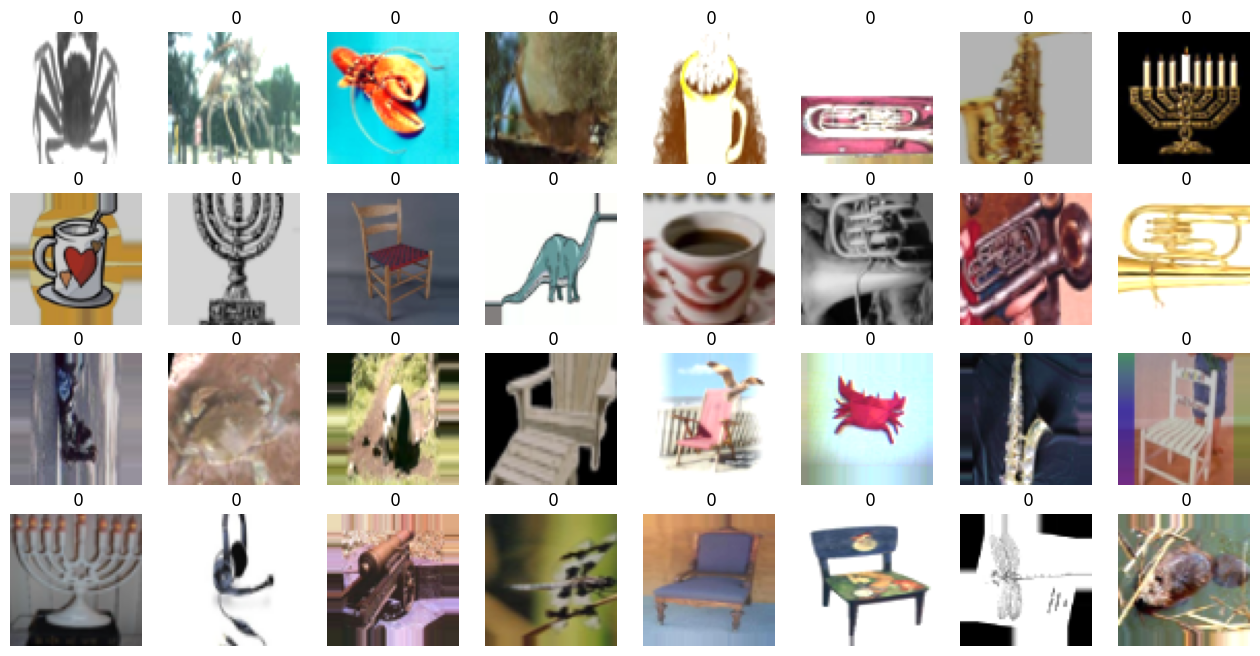

In [196]:
# augs = train_generator.__getitem__(8)

# plt.figure(figsize=(16, 8))
# for i, img in enumerate(augs[0]):
#  plt.subplot(4, 8, i+1)
#  plt.title('%2.f' % augs[1][i][0])
#  plt.axis('off')
#  plt.imshow(img.squeeze())

In [197]:
# 모델구조 정의
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# model.summary()

In [198]:
history = model.fit(train_generator, epochs=35, validation_data=test_generator)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

Epoch 1/35
27/27 [==============================] - 3s 54ms/step - loss: 3.0611 - accuracy: 0.0607 - val_loss: 2.9793 - val_accuracy: 0.0616
Epoch 2/35
27/27 [==============================] - 1s 52ms/step - loss: 2.9262 - accuracy: 0.1119 - val_loss: 2.8616 - val_accuracy: 0.1517
Epoch 3/35
27/27 [==============================] - 1s 53ms/step - loss: 2.8005 - accuracy: 0.1655 - val_loss: 2.7481 - val_accuracy: 0.1659
Epoch 4/35
27/27 [==============================] - 1s 53ms/step - loss: 2.5951 - accuracy: 0.2190 - val_loss: 2.5190 - val_accuracy: 0.3128
Epoch 5/35
27/27 [==============================] - 1s 52ms/step - loss: 2.4181 - accuracy: 0.2845 - val_loss: 2.4409 - val_accuracy: 0.2891
Epoch 6/35
27/27 [==============================] - 1s 51ms/step - loss: 2.2685 - accuracy: 0.3250 - val_loss: 2.1428 - val_accuracy: 0.4028
Epoch 7/35
27/27 [==============================] - 1s 50ms/step - loss: 2.1197 - accuracy: 0.3821 - val_loss: 2.2206 - val_accuracy: 0.3649
Epoch 8/35
27

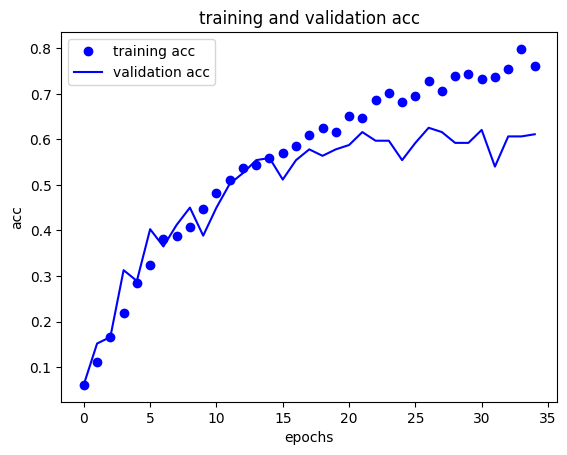

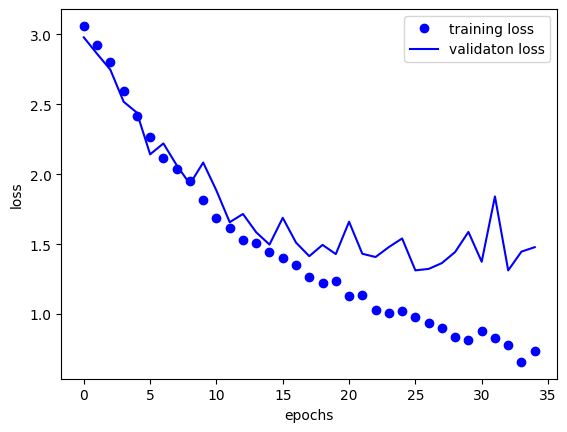

In [199]:
# 정확도 그래프
plt.plot(epochs, accuracy, 'bo' ,label='training acc')
plt.plot(epochs, val_accuracy, 'b', label='validation acc')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validaton loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [200]:
score = model.evaluate(test_generator)
print('loss', score[0])
print('acc', score[1])

7/7 [==============================] - 0s 4ms/step - loss: 1.4786 - accuracy: 0.6114
loss 1.4785706996917725
acc 0.6113743782043457


In [206]:
test_image = '/content/drive/MyDrive/대회/CapStone/data/test_data/ant.jpg'

img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((64, 64))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1, 64, 64, 3)

pred = model.predict(X)
result = [np.argmax(value) for value in pred]
print(categories[result[0]])

1/1 [==============================] - 0s 156ms/step
ant
